---
layout: default
title: "Linear Regression - Gradient Descent"
categories: linearRegression
permalink: /ML4/
order: 4
comments: true
---

In [2]:
%pylab --no-import-all inline
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


# Gradient descent

So we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where gradient descent comes in.

Imagine that we graph the cost function based on its fields $\theta_0$ and $\theta_1$. We are not graphing $x$ and $y$ itself, but the parameter range of our hypothesis function and the cost resulting from selecting a particular set of parameters.

We put $\theta_0$ on the $x$ axis and $\theta_1$ on the $y$ axis, with the cost function on the vertical $z$ axis. The points on our graph will be the result of the cost function using our hypothesis with those specific theta parameters. The graph below depicts such a setup.

In [3]:
df = pd.read_csv('data/house_pricing.csv').drop('rooms', axis=1)
X, y = df.T.values
# scale features (tried min-max scaling but it's not working so well)
X = X/1000
# add bias to features array
X = np.vstack([np.ones(len(X)), X]).T

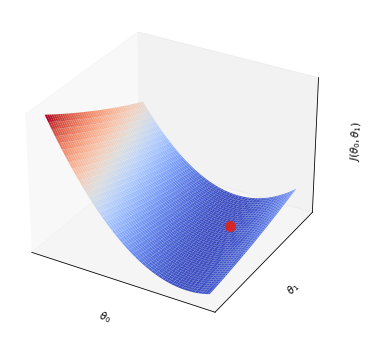

In [4]:
# define the cost function
J = lambda x, y, theta: np.average((x.dot(theta) - y)**2)/2

# draw contour plot of cost function
steps = 100
## create a series of parameters values for theta0 and theta1
theta_zeros = np.linspace(-10000, 100000, steps)
theta_ones = np.linspace(-10000, 200000, steps)
## create a table of theta0 theta1 combinations
xx, yy = np.meshgrid(theta_zeros, theta_ones)
## init a grid where to store cost for each combination of paramters
jj = np.zeros((steps, steps))
## fill the grid with the cost for each combination of parameters
for i, t0 in enumerate(theta_zeros):
    for j, t1 in enumerate(theta_ones):
        jj[i, j] = J(X, y, [t0, t1])

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, jj, cmap='coolwarm');
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0, \theta_1)$');
i, j = numpy.unravel_index(jj.argmin(), jj.shape)
ax.plot(theta_zeros[i], theta_ones[j], np.min(jj), marker='o', ls='none', c='C3', markersize=10, zorder=10);

We will know that we have succeeded when our cost function is at the very bottom of the pits in our graph, i.e. when its value is the minimum. The red point shows the minimum in the graph.

The way we do this is by taking the derivative (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter $\alpha$, which is called the **learning rate**. 

For example, the distance between each 'star' in the graph above represents a step determined by our parameter α. A smaller α would result in a smaller step and a larger α results in a larger step. The direction in which the step is taken is determined by the partial derivative of $J(\theta_0,\theta_1)$. Depending on where one starts on the graph, one could end up at different points. The image above shows us two different starting points that end up in two different places. 

The gradient descent algorithm consists in repeating until convergence:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)
$$

where $j=0,1$ represents the feature index number.

When the partial derivative of $\theta_j$ is analytically solved, the gradient descent beocmes:

$$
\begin{align}
& \text{repeat until convergence } \big\lbrace \\
& \theta_j := \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m  \left(h_\theta \left(x^{(i)}\right) - y^{(i)} \right)x^{(i)} \qquad \text{for } j := 0 \dots n \\
&\big\rbrace
\end{align}
$$

At each iteration $j$, one should simultaneously update the parameters $\theta_1, \theta_2,...,\theta_n$. Updating a specific parameter prior to calculating another one on the $j^{(th)}j $(th) iteration would yield to a wrong implementation.

When written in tis vectorial form, the simultaneus update is already encoded in its expression:

$$
\frac{\partial}{\partial\theta_j}J(\theta)=X^T (X\theta-y)
$$

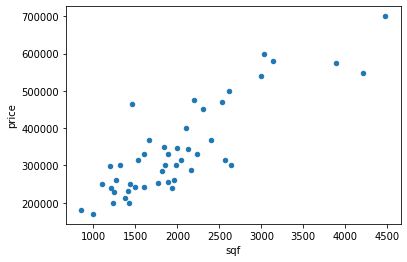

In [5]:
df.plot.scatter(x='sqf', y='price');

In [6]:
%%capture
# create the figure
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
# get features and labels in numpy arrays

# plot feature vs label
ax1.scatter(X[:, 1], y)

# define the cost function
J = lambda x, y, theta: np.average((x.dot(theta) - y)**2)/2

# draw contour plot of cost function
steps = 100
## create a series of parameters values for theta0 and theta1
theta_zeros = np.linspace(-10000, 100000, steps)
theta_ones = np.linspace(-10000, 200000, steps)
## create a table of theta0 theta1 combinations
xx, yy = np.meshgrid(theta_zeros, theta_ones)
## init a grid where to store cost for each combination of paramters
jj = np.zeros((steps, steps))
## fill the grid with the cost for each combination of parameters
for i, t0 in enumerate(theta_zeros):
    for j, t1 in enumerate(theta_ones):
        jj[i, j] = J(X, y, [t0, t1])
## draw the contour plot
ax2.contour(xx, yy, jj, np.logspace(1, 15, 100))

In [7]:
# define m (# examples)
m = len(y)
# define alpha (learning rate)
alpha = 0.05
# init parameters as [0, 0]
theta = np.zeros(2)
# feed the first parameters combination to the parameters history
params = [theta]

#calculate gradient descent and save obtained parameters in parameters history
## ten gradient descent steps
for i in range(10):
    ## define prediction
    p = X.dot(theta)
    ## define gradients
    gradients = X.T.dot(p-y)
    ## update parameters
    theta = theta - (1/m) * alpha * gradients
    ## save parameters in parameters history
    params.append(theta)

# define function called at each frame
def animate(i, params):
    theta = params[i]
    line = ax2.plot(*theta, marker='o')
    ax1.plot((0, max(X[:, 1])), (theta[0], theta[1]*max(X[:, 1])))
    return line

# pre-calculate all animation frames
anim = animation.FuncAnimation(fig, animate, fargs=(params, ), 
                               frames=10, interval=500, repeat=True,
                               blit=False)
# compile animation in a javascript function embedded in a <script> tag and feed it to the HTML jupyter display
HTML(anim.to_jshtml())

## Feature scaling
We can speed up gradient descent by having each of our input values in roughly the same range. This is because $\theta$ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$$−1 ≤ x_{(i)}x $$

or

$$−0.5 ≤ x_{(i)}x $$

These aren't exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are feature scaling and mean normalization. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:

$$x_i := \dfrac{x_i - \mu_i}{s_i}x $$

Where $μ_i$ is the average of all the values for feature $(i)$ and $s_i$ is the range of values (max - min), or $s_i$ is the standard deviation.

Note that dividing by the range, or dividing by the standard deviation, give different results. The quizzes in this course use range - the programming exercises use standard deviation. For example, if $x_i$ represents housing prices with a range of 100 to 2000  and a mean value of 1000, then, 

$$x_i := \dfrac{price-1000}{1900}x$$

## Learning rate
Make a plot with number of iterations on the x-axis. Now plot the cost function, J(θ) over the number of iterations of gradient descent. If J(θ) ever increases, then you probably need to decrease $\alpha$.

Automatic convergence test: Declare convergence if $J(\theta)$ decreases by less than $E$ in one iteration, where $E$ is some small value such as $10^{−3}$. However in practice it's difficult to choose this threshold value.

It has been proven that if learning rate $\alpha$ is sufficiently small, then $J(\theta)$ will decrease on every iteration.

To summarize:

* If $\alpha$ is too small: slow convergence;
* If $\alpha$ is too large: may not decrease on every iteration and thus may not converge.


# Normal equation
Gradient descent gives one way of minimizing $J$. Let’s discuss a second way of doing so, this time performing the minimization explicitly and without resorting to an iterative algorithm. In the "Normal Equation" method, we will minimize $J$ by explicitly taking its derivatives with respect to the $\theta_j$ ’s, and setting them to zero. This allows us to find the optimum theta without iteration. The normal equation formula is given below: 

$$
\theta = (X^T X)^{-1}X^T y
$$


There is no need to do feature scaling with the normal equation.

The following is a comparison of gradient descent and the normal equation:

| Gradient descent             | Normal equation                                   |
|------------------------------|---------------------------------------------------|
| Need to chose alpha          | No need to choose alpha                           |
| Needs many iteration         | No need to iterate                                |
| $O(kn^2)$                    | $O(n^3)$, need to calculate the inverse of $X^TX$ |
| Works well when $n$ is large | Slow if $n$ is very large                         |

With the normal equation, computing the inversion has complexity $\mathcal{O}(n^3)$. So if we have a very large number of features, the normal equation will be slow. In practice, when $n$ exceeds $10\,000$ it might be a good time to go from a normal solution to an iterative process.